In [1]:
# Perform imports and load the dataset:
import pandas as pd

In [2]:
df = pd.read_csv("Processed_Reviews.csv",encoding="ISO-8859-1")
df.shape

(13, 15)

In [3]:
df.head()

,Review,lowercased,urls_removed,html_removed,emojis_removed,slangs_replaced,contractions_replaced,punctuations_removed,numbers_removed,spelling_corrected,stopwords_removed,stemmed_words,lemmatized,label,tokenized
0,The product arrived on time. Packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time. packaging was gre...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,the product arrived on time packaging was grea...,product arrived time packaging great quality a...,product arriv time packag great qualiti amaz,product arrive time packaging great quality am...,1,"['product', 'arrive', 'time', 'packaging', 'gr..."
1,THIS PRODUCT IS JUST AMAZING! I LOVE IT.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing! i love it.,this product is just amazing i love it,this product is just amazing i love it,this product is just amazing i love it,product amazing love,product amaz love,product amaze love,1,"['product', 'amaze', 'love']"
2,"I bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...","i bought this phone for $799, and it has a 120...",i bought this phone for 799 and it has a 120hz...,i bought this phone for and it has a hz displ...,i bought this phone for and it has a hz displ...,bought phone hz display totally worth,bought phone hz display total worth,buy phone hz display totally worth,1,"['buy', 'phone', 'hz', 'display', 'totally', '..."
3,Wow!!! This product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow!!! this product is awesome... but a bit ex...,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow this product is awesome but a bit expensive,wow product awesome bit expensive,wow product awesom bit expens,wow product awesome bit expensive,0,"['wow', 'product', 'awesome', 'bit', 'expensive']"
4,The laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine.,the laptop works perfectly fine,the laptop works perfectly fine,the laptop works perfectly fine,laptop works perfectly fine,laptop work perfectli fine,laptop work perfectly fine,1,"['laptop', 'work', 'perfectly', 'fine']"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Review                 13 non-null     object
 1   lowercased             13 non-null     object
 2   urls_removed           13 non-null     object
 3   html_removed           13 non-null     object
 4   emojis_removed         13 non-null     object
 5   slangs_replaced        13 non-null     object
 6   contractions_replaced  13 non-null     object
 7   punctuations_removed   13 non-null     object
 8   numbers_removed        13 non-null     object
 9   spelling_corrected     13 non-null     object
 10  stopwords_removed      13 non-null     object
 11  stemmed_words          13 non-null     object
 12  lemmatized             13 non-null     object
 13  label                  13 non-null     int64 
 14  tokenized              13 non-null     object
dtypes: int64(1), object(14)
m

In [5]:
# Checking for null values
df.isnull().sum()

Review                   0
lowercased               0
urls_removed             0
html_removed             0
emojis_removed           0
slangs_replaced          0
contractions_replaced    0
punctuations_removed     0
numbers_removed          0
spelling_corrected       0
stopwords_removed        0
stemmed_words            0
lemmatized               0
label                    0
tokenized                0
dtype: int64

In [6]:
# Checking Duplicate values
df.duplicated().sum()


0

In [7]:
# Drop Duplicate values
df=df.drop_duplicates()
df.shape

(13, 15)

In [ ]:
#Pre-processing:
o Use only the lemmatized column.
o Convert labels to numeric if they are categorical

In [9]:
# import library
import re
import string
import nltk
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

In [11]:
stemmer = nltk.SnowballStemmer("english")

In [12]:
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)  # Remove stopwords
    return text

In [ ]:
#Vectorization:
o Apply TfidfVectorizer to transform the text data into numerical features.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
X = tfidf_vect.fit_transform(df['message_clean'])
y = df['label'] # Labels (1 = positive, 0 = negative)

KeyError: 'message_clean'

In [ ]:
#Model Training:
o Split the data into training and test sets.
o Train a classifier such as Naïve Bayes or SVM.

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [32]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)
# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
#Evaluation:
o Evaluate the model using accuracy, precision, recall, and F1-score.
o Optionally, display the confusion matrix.

In [34]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score # Importing accuracy_score
# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)
# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

In [35]:
nb_cm


array([[4]])

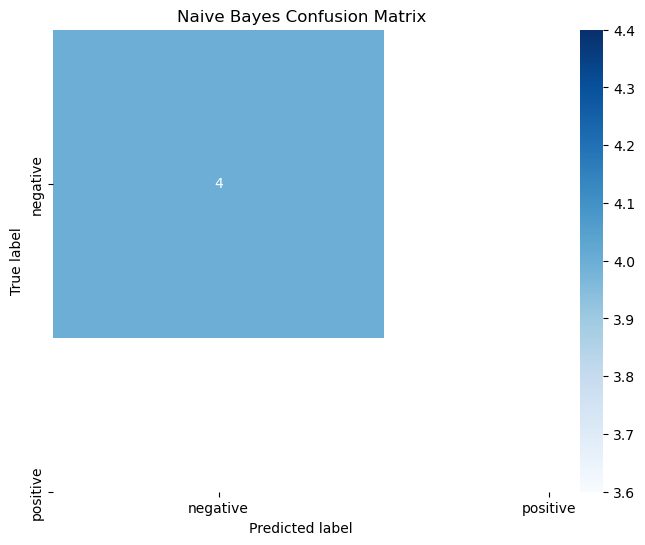

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Naive Bayes Error Rate: 0.00


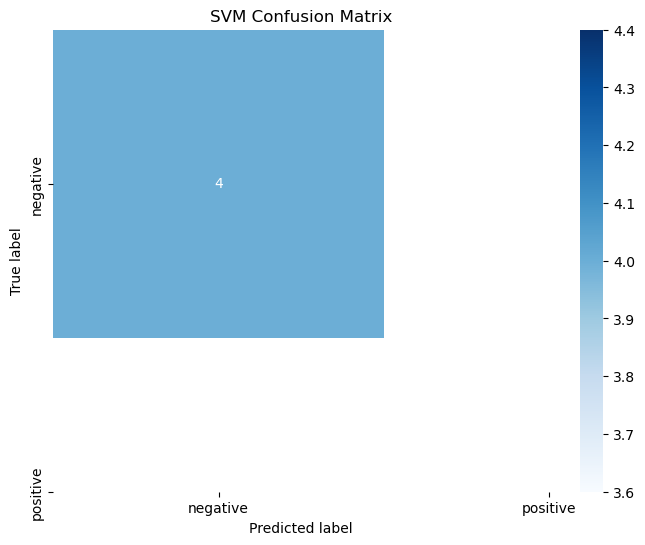


SVM Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


SVM Error Rate: 0.00


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")